In [7]:
#读取MNIST数据
## 在conda python环境中，tensorflow 1.15可能没有examples文件
##在\Lib\site-packages\tensorflow\文件夹下没有examples文件
##就在tensroflow_core文件中复制examples
from tensorflow.examples.tutorials.mnist import input_data
mnist_data_folder = "MNIST_data/"
data = input_data.read_data_sets(mnist_data_folder, one_hot=False)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [8]:
##准备训练数据，验证数据，测试数据
X0 = data.train.images
Y0 = data.train.labels
X1 = data.validation.images
Y1 = data.validation.labels
X2 = data.test.images
Y2 = data.test.labels


print(X0.shape)

(55000, 784)


<Figure size 432x288 with 0 Axes>

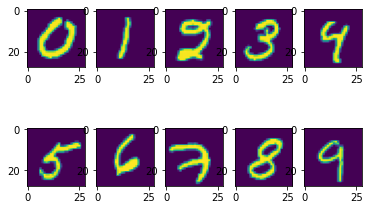

In [9]:
# 手写数字展示
from matplotlib import pyplot as plt

plt.figure()
fig, ax = plt.subplots(2, 5)
ax = ax.flatten()
for i in range(10):
    Im = X0[Y0 == i][0].reshape(28, 28)
    ax[i].imshow(Im)
plt.show()

In [10]:
#产生one_hot型因变量
print(Y0)
from keras.utils import to_categorical

YY0 = to_categorical(Y0)
YY1 = to_categorical(Y1)
YY2 = to_categorical(Y2)
print(YY0)

[7 3 4 ... 5 6 8]


Using TensorFlow backend.


[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [11]:
#模型构建
from keras.layers import Input, Dense, Activation
from keras import Model

input_shape = (784,)
input_layer = Input(input_shape)
x = Dense(10)(input_layer)
x = Activation("softmax")(x)
output_layer = x

model = Model(input_layer, output_layer)
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [12]:
#模型编译
from keras.optimizers import Adam

model.compile(optimizer=Adam(0.01), loss="categorical_crossentropy", metrics=["accuracy"])  #默认值是0.1

In [13]:
#模型拟合
history = model.fit(X0, YY0,
                    validation_data=(X1, YY1),
                    batch_size=1000,
                    epochs=10)


Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 2s 40us/step - loss: 0.5664 - accuracy: 0.8395 - val_loss: 0.3226 - val_accuracy: 0.9104
Epoch 2/10
55000/55000 [==============================] - 0s 4us/step - loss: 0.3218 - accuracy: 0.9096 - val_loss: 0.2865 - val_accuracy: 0.9188
Epoch 3/10
55000/55000 [==============================] - 0s 4us/step - loss: 0.2939 - accuracy: 0.9180 - val_loss: 0.2733 - val_accuracy: 0.9248
Epoch 4/10
55000/55000 [==============================] - 0s 4us/step - loss: 0.2816 - accuracy: 0.9218 - val_loss: 0.2719 - val_accuracy: 0.9232
Epoch 5/10
55000/55000 [==============================] - 0s 4us/step - loss: 0.2734 - accuracy: 0.9226 - val_loss: 0.2657 - val_accuracy: 0.9262
Epoch 6/10
55000/55000 [==============================] - 0s 4us/step - loss: 0.2661 - accuracy: 0.9258 - val_loss: 0.2604 - val_accuracy: 0.9264
Epoch 7/10
55000/55000 [==============================] - 0s 4us/step - l

In [18]:
#调用model.fit返回一个history对象。这个对象有个成员history，
# 它是一个字典，里面包含训练过程中所有的数据
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

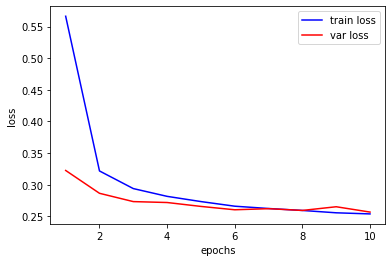

In [19]:
#查看实验损失函数图
import matplotlib.pyplot as plt

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values) + 1)
#绘制训练损失函数
plt.plot(epochs, loss_values, color="blue", label="train loss")
plt.plot(epochs, val_loss_values, color="red", label="var loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()  #给图像加图例
plt.show()

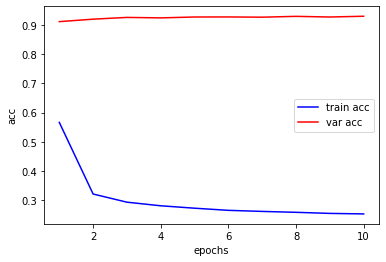

In [20]:
#import matplotlib.pyplot as plt

loss_acc = history_dict["loss"]
val_loss_acc = history_dict["val_accuracy"]

epochs = range(1, len(loss_acc) + 1)
#绘制精确度变化曲线图
plt.plot(epochs, loss_acc, color="blue", label="train acc")
plt.plot(epochs, val_loss_acc, color="red", label="var acc")
plt.xlabel("epochs")
plt.ylabel("acc")
plt.legend()  #给图像加图例
plt.show()

In [21]:
#以上的模型针对于10分类问题精度已经达到93%

result = model.evaluate(X2, YY2)  #输入数据和标签，返回损失和精确度
result

10000/10000 [==============================] - 0s 32us/step


[0.2638124367982149, 0.9269999861717224]

In [23]:
#查看第二层的权重参数
a = model.layers[1].get_weights()
model.layers[1].get_weights()[0].shape
a

AttributeError: 'Dense' object has no attribute 'get_weight'

In [ ]:
#预测一下测试集里面的第二张图片
import numpy as np

x = X2[1]
x = x.reshape(1, 784)
y_pre_pic2 = model.predict(x)
y_pre_pic2 = np.argmax(y_pre_pic2)
y_pre_pic2

In [ ]:
Y2[1]

In [ ]:
#计算预测值与真实值的精确度
from sklearn import metrics

y_pre = model.predict(X2)
#y_pre.shape
y_pre_labels = []
for i in range(len(y_pre)):
    y_labels = np.argmax(y_pre[i])
    y_pre_labels.append(y_labels)

len(y_pre_labels)

acc = metrics.accuracy_score(Y2, y_pre_labels)
acc